In [1]:
import pandas as pd

df = pd.read_csv('organic.csv')
df

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1
...,...,...,...,...,...,...,...
185,2-nitroaniline,1.85,-9.068,-0.6488,-0.7937,0.3510,2
186,3-nitroaniline,1.37,-9.254,-0.9468,-0.9503,0.3922,2
187,4-nitroaniline,1.39,-9.160,-0.6493,0.7050,0.3134,2
188,2-chloro-4-nitroaniline,2.06,-9.256,-0.6434,-0.9066,0.3183,2


In [2]:
df['Gap'] = df['ELUMO'] - df['EHOMO']
df

,Compound,log(Kow),EHOMO,Q-,ELUMO,Q+,Class,Gap
0,methanol,-0.77,-11.135,-0.5353,3.7775,0.3182,1,14.9125
1,ethanol,-0.31,-11.050,-0.5360,3.6513,0.3107,1,14.7013
2,1-propanol,0.25,-10.940,-0.5317,3.6324,0.3122,1,14.5724
3,2-propanol,0.05,-10.895,-0.5469,3.4925,0.3166,1,14.3875
4,1-butanol,0.88,-10.940,-0.5422,3.5041,0.3141,1,14.4441
...,...,...,...,...,...,...,...,...
185,2-nitroaniline,1.85,-9.068,-0.6488,-0.7937,0.3510,2,8.2743
186,3-nitroaniline,1.37,-9.254,-0.9468,-0.9503,0.3922,2,8.3037
187,4-nitroaniline,1.39,-9.160,-0.6493,0.7050,0.3134,2,9.8650
188,2-chloro-4-nitroaniline,2.06,-9.256,-0.6434,-0.9066,0.3183,2,8.3494


In [3]:
X = df[['Q-', 'Gap']].values
y = df['Class'].values

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X, y)

DecisionTreeClassifier()

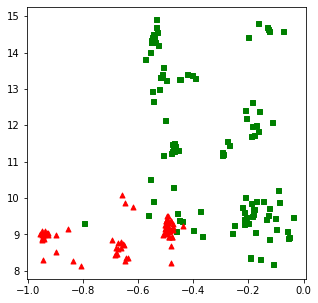

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
x1 = df.iloc[:114, 3]
y1 = df.iloc[:114, 7]
x2 = df.iloc[114:, 3]
y2 = df.iloc[114:, 7]
plt.scatter(x1, y1, c = 'g', marker = 's', s = 25)
plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
plt.show()

In [6]:
import numpy as np

xx, yy = np.meshgrid(np.arange(-1.0, 0.1, 0.01), np.arange(8, 15.2, 0.01))
coords = np.stack((xx.reshape(-1), yy.reshape(-1)), axis = 1)

In [11]:
Z = clf_tree.predict(coords)
Z = Z.reshape(xx.shape)

In [12]:
Z

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=int64)

In [15]:
from matplotlib.colors import ListedColormap

def plot_res(xx, yy, Z):
    light_rgb = ListedColormap(['#AAFFAA', '#FFAAAA'])
    plt.figure(figsize = (5, 5))
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap = light_rgb)
    plt.scatter(x1, y1, c = 'g', marker = 's', s = 20)
    plt.scatter(x2, y2, c = 'r', marker = '^', s = 25)
    plt.show()

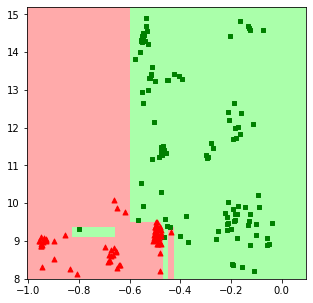

In [16]:
plot_res(xx, yy, Z)

# 10:06继续

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
clf_nb = GaussianNB()
clf_nb.fit(X, y)

GaussianNB()

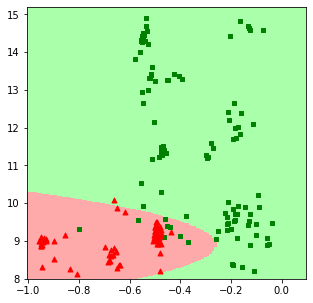

In [19]:
Z = clf_nb.predict(coords)
Z = Z.reshape(xx.shape)
plot_res(xx, yy, Z)

In [20]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, clf_tree.predict(X)))

1.0


In [21]:
print(accuracy_score(y, clf_nb.predict(X)))

0.9473684210526315


In [22]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(clf_tree, X, y, cv = 10)
print('mean acc: %.3f' % np.mean(acc))

mean acc: 0.953


In [23]:
acc = cross_val_score(clf_nb, X, y, cv = 10)
print('mean acc: %.3f' % np.mean(acc))

mean acc: 0.942


# 11:06继续